In [0]:
!pip install fbprophet

In [0]:
import os
import os.path
from os import path
import pandas as pd
from fbprophet import Prophet

In [0]:
dis = {'Abdominal Aortic Aneurysm':False,
 'Alzheimers':False,
 'Arthritis':False,
 'Autism':False,
 'Bacterial Vaginosis':False,
 'Bird Flu':False,
 'Breast Cancer':False,
 'CKD (Kidney Disease)':False,
 'Campy':False,
 'Candidiasis':False,
 'Carpal Tunnel Syndrome':False,
 'Diabetes':False,
 'Down Syndrome':False,
 'Epilepsy':False,
 'Giardiasis':False,
 'Gonorrhea ':False,
 'H1N1 Flu':False,
 'Herpes':False,
 'Hypertension':False,
 'Jaundice':False,
 'Keratitis':False,
 'Lead Poisoning':False,
 'Lice':False,
 'Meningitis':False,
 'Osteoarthritis':False,
 'Oral Cancer':False,
 'Pandemic Flu':False,
 'Plague':False,
 'Scabies':False,
 'Ticks':False,
 'Yellow Fever':False}

In [0]:
dis1 = pd.read_csv('/content/drive/My Drive/272/disease-drug.csv')
dis1.drop('drug__-',inplace=True,axis=1)
dis1.drop('drugs__004',inplace=True,axis=1)

In [41]:
with open(f'/content/drive/My Drive/272/predictions/final.csv',"a") as f:
  for disease in dis.keys():
    if dis[disease] == False:
      data=pd.read_csv(f'/content/drive/My Drive/272/{disease}.csv')
      trans=data.transpose()
      trans.columns=list(trans.iloc[0,:])
      trans.drop("geoName",inplace=True,axis=0)
      trans['ds']=trans.index
      trans.reset_index(drop=True,inplace=True)
      trans.ds=trans.ds.apply(lambda x: x[:-1])
      drug1 = ""
      drug2 = ""
      drug3 = ""
      for val in dis1[dis1['name'] == disease].drugs__001:
        drug1 = val  
      for val in dis1[dis1['name'] == disease].drugs__002:
        drug2 = val
      for val in dis1[dis1['name'] == disease].drugs__003:
        drug3 = val
      for col in trans.columns:    
        if len(col) > 3:
          if col[-3] == " ":
            mydata=pd.concat([trans.ds,trans[col]],axis=1)
            mydata.columns=['ds','y']
            model=Prophet()
            model.fit(mydata)
            future = model.make_future_dataframe(periods=3, freq='M')
            fcst = model.predict(future)
            f.write(f"{disease},{col},{int(fcst['yhat'][-1:])},{drug1},{drug2},{drug3}\n")
            print(f"{disease},{col},{int(fcst['yhat'][-1:])},{drug1},{drug2},{drug3}\n") 
            dis[disease] = True

Output hidden; open in https://colab.research.google.com to view.

In [0]:
data=pd.read_csv(f'/content/drive/My Drive/272/Alzheimers.csv')
trans=data.transpose()

In [0]:
trans.columns=list(trans.iloc[0,:])

In [0]:
trans.drop("geoName",inplace=True,axis=0)

In [0]:
trans['ds']=trans.index

In [0]:
trans.reset_index(drop=True,inplace=True)

In [0]:
trans.ds=trans.ds.apply(lambda x: x[:-1])

In [0]:
#mydata=trans['San Francisco-Oakland-San Jose CA']

In [0]:
us_count = 0
total = 0
for cols in trans.columns:
  total += 1
  #print(f"Cols = {cols},{cols[-3]},")
  if len(cols)>3:
    if cols[-3] == " ":
      us_count += 1
    print(cols)
print(f"Total = {total} and us = {us_count}")

Abilene-Sweetwater TX
Aisne
Albany GA
Albany-Schenectady-Troy NY
Albuquerque-Santa Fe NM
Alexandria LA
Allier
Alpena MI
Alpes-Maritimes
Alpes-de-Haute-Provence
Amarillo TX
Anchorage AK
Ardeche
Ardennes
Ariege
Atlanta GA
Aube
Aude
Augusta GA
Austin TX
Aveyron
Bakersfield CA
Baltimore MD
Bangor ME
Bas-Rhin
Baton Rouge LA
Beaumont-Port Arthur TX
Bend OR
Billings, MT
Biloxi-Gulfport MS
Binghamton NY
Birmingham AL
Bluefield-Beckley-Oak Hill WV
Boise ID
Boston MA-Manchester NH
Bouches-du-Rhone
Bowling Green KY
Buffalo NY
Burlington VT-Plattsburgh NY
Butte-Bozeman MT
Calvados
Cantal
Casper-Riverton WY
Cedar Rapids-Waterloo-Iowa City & Dubuque IA
Champaign & Springfield-Decatur IL
Charente
Charente-Maritime
Charleston SC
Charleston-Huntington WV
Charlotte NC
Charlottesville VA
Chattanooga TN
Cher
Cheyenne WY-Scottsbluff NE
Chicago IL
Chico-Redding CA
Cincinnati OH
Clarksburg-Weston WV
Cleveland-Akron (Canton) OH
Colorado Springs-Pueblo CO
Columbia SC
Columbia-Jefferson City MO
Columbus GA
Colu

In [0]:
mydata=pd.concat([trans.ds,trans['San Francisco-Oakland-San Jose CA']],axis=1)

In [0]:
mydata.columns=['ds','y']
mydata

,ds,y
0,2015-01,7
1,2015-02,11
2,2015-03,8
3,2015-04,10
4,2015-05,12
5,2015-06,7
6,2015-07,11
7,2015-08,10
8,2015-09,15
9,2015-10,13


In [0]:
model=Prophet()

In [0]:
model.fit(mydata)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=3, freq='M')

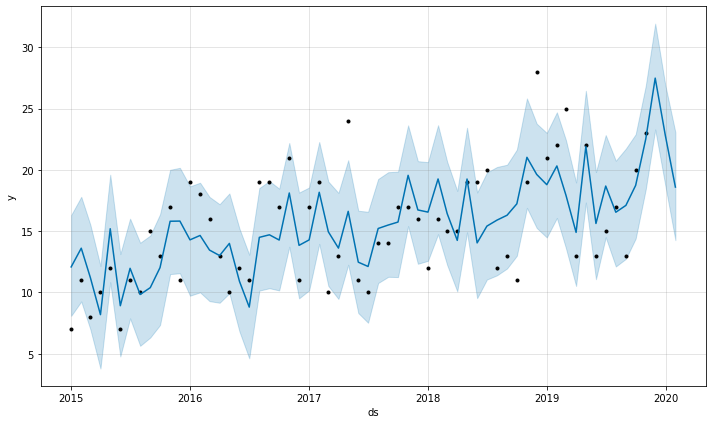

In [0]:
fcst = model.predict(future)
fig = model.plot(fcst)

In [0]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,10.642887,8.092636,16.313627,10.642887,10.642887,1.439704,1.439704,1.439704,1.439704,1.439704,1.439704,0.0,0.0,0.0,12.082591
1,2015-02-01,10.785212,9.267816,17.799301,10.785212,10.785212,2.824879,2.824879,2.824879,2.824879,2.824879,2.824879,0.0,0.0,0.0,13.610090
2,2015-03-01,10.913763,6.993496,15.517287,10.913763,10.913763,0.296513,0.296513,0.296513,0.296513,0.296513,0.296513,0.0,0.0,0.0,11.210275
3,2015-04-01,11.056087,3.795770,12.159485,11.056087,11.056087,-2.864348,-2.864348,-2.864348,-2.864348,-2.864348,-2.864348,0.0,0.0,0.0,8.191739
4,2015-05-01,11.193821,10.839563,19.603931,11.193821,11.193821,4.004573,4.004573,4.004573,4.004573,4.004573,4.004573,0.0,0.0,0.0,15.198394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2019-10-01,18.603872,14.397843,22.902920,18.603872,18.603872,0.132503,0.132503,0.132503,0.132503,0.132503,0.132503,0.0,0.0,0.0,18.736375
58,2019-11-01,18.746197,18.419737,26.857039,18.746197,18.746197,3.770344,3.770344,3.770344,3.770344,3.770344,3.770344,0.0,0.0,0.0,22.516540
59,2019-11-30,18.879339,23.292686,31.921503,18.879339,18.879339,8.599089,8.599089,8.599089,8.599089,8.599089,8.599089,0.0,0.0,0.0,27.478428
60,2019-12-31,19.021663,18.735391,26.916825,19.021663,19.021663,3.799473,3.799473,3.799473,3.799473,3.799473,3.799473,0.0,0.0,0.0,22.821136


In [0]:
int(fcst['yhat'][-1:])

61    18.593682
Name: yhat, dtype: float64

In [0]:
dis1 = pd.read_csv('/content/drive/My Drive/272/disease-drug.csv')

In [0]:
dis1.head()

,name,drug__-,drugs__001,drugs__002,drugs__003,drugs__004
0,Anxiety,NaN,Xanax,Clonazepam,Alprazolam,NaN
1,AIDS (Acquired Immune Deficiency Syndrome),NaN,Atrila,Comprela,NaN,NaN
2,ALS (Amyotrophic Lateral Sclerosis),NaN,Riluzole,Edaravone,NaN,NaN
3,Abdominal Aortic Aneurysm,NaN,NaN,NaN,NaN,NaN
4,African Trypanosomiasis,NaN,Nifurtimox,Eflornithine,NaN,NaN


In [0]:
dis1.drop('drug__-',inplace=True,axis=1)

In [0]:
dis1.drop('drugs__004',inplace=True,axis=1)

In [0]:
dis1[dis1['name'] == 'Alzheimers'].drugs__001
dis1[dis1['name'] == 'Alzheimers'].drugs__002
dis1[dis1['name'] == 'Alzheimers'].drugs__003

6    NaN
Name: drugs__003, dtype: object

In [0]:
with open(f'/content/drive/My Drive/272/predictions/eg1.csv',"a") as f:
  f.write(f"{disease},{int(fcst['yhat'][-1:])}\n")
f.close()

In [0]:
for val in dis1[dis1['name'] == 'Alzheimers'].drugs__001:
  print(val)

TypeError: ignored